In [1]:
import Ativo as at
import FileManager as fman
import pickle
import pandas as pd
import numpy as np
# import datetime
from matplotlib import pyplot as plt
import TradesAnalyser as ta
import seaborn as sns

In [2]:
fm = fman.FileManager()

In [3]:
with open('AtivoDiaList.pkl', 'rb') as filehandle: # w de write e b de binary
    ativo_dia_list = pickle.load(filehandle) # notar como para salvar precisamos passar a list e o filehandle, mas pra abrir não

In [4]:
an = ta.TradesAnalyser(ativo_dia_list)

In [5]:
an.setFilterParameters(gap_threshold=0.1, F_high_threshold=9)
an.runFiltering()

In [6]:
an.setSimParameters(start_money = 10000,allocation=0.1)
an.setAlgoParameters(short_after=0, exit_target=0.4, exit_stop=0.4)
an.runSimulation()
# an.saveTrades('case1_trades.pkl')

# an.openTrades('case1_trades.pkl')

In [7]:
an.saveTrades('case4_trades.pkl')

In [8]:
dfd = an.getFilteredDays() # DataFrame of filtered ativo-dias
dft = an.getTrades() # DataFrame of trades

In [9]:
# CALCULA DATAFRAME DE TRADE RESULTS, QUE VAI PEGAR ELEMENTOS QUE INTERESSAM DA INNER JOIN ENTRE dfd e dft
dftr = pd.merge(dft,dfd,how='inner',on=['name','date'])
dftr = dftr[['name','date','gap','factorF','profit','cumprofit']]
dftr

,name,date,gap,factorF,profit,cumprofit
0,NNDM,2019-10-23,0.567944,0.112574,0.286667,1.028667
1,XNET,2019-10-28,0.259833,0.272726,0.065743,1.035429
2,RDHL,2019-11-04,0.216450,0.309420,0.132859,1.049186
3,FPAY,2019-11-05,0.396450,0.201564,0.254237,1.075860
4,CLVS,2019-11-07,0.201117,0.057849,-0.006558,1.075155
...,...,...,...,...,...,...
485,JE,2020-10-09,0.157424,2.321011,0.007728,28.741622
486,VVPR,2020-10-09,0.588766,17.884116,-0.400000,27.591958
487,MDRR,2020-10-14,0.733906,3.499348,-0.400000,26.488279
488,IDXG,2020-10-14,0.367893,6.666351,0.029609,26.566708


In [10]:
# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
bins = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2]
gap = np.clip( dftr['gap'], bins[0], bins[-1] )
dftr.groupby(pd.cut(gap, bins)).agg(
    winrate=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x>=0)/(sum(x>=0) + sum(x<0)) ),
    lossrate=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x<0)/(sum(x>=0) + sum(x<0)) ),
    mean=pd.NamedAgg(column='profit',aggfunc=lambda x: x.mean()),
    mean_of_pos=pd.NamedAgg(column='profit',aggfunc=lambda x: x[x>=0].mean()),
    mean_of_neg=pd.NamedAgg(column='profit',aggfunc=lambda x: x[x<0].mean()),
    count=pd.NamedAgg(column='profit',aggfunc='count'),
    positives=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x>=0) ),
    negatives=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x<0) )
)

,winrate,lossrate,mean,mean_of_pos,mean_of_neg,count,positives,negatives
gap,,,,,,,,
"(0.2, 0.3]",0.733333,0.266667,0.052495,0.132857,-0.168500,75,55.0,20.0
"(0.3, 0.4]",0.869565,0.130435,0.095849,0.144679,-0.229683,46,40.0,6.0
"(0.4, 0.5]",0.731707,0.268293,0.056371,0.173417,-0.262844,41,30.0,11.0
"(0.5, 0.6]",0.750000,0.250000,0.054947,0.166268,-0.279017,44,33.0,11.0
"(0.6, 0.7]",0.758621,0.241379,0.062181,0.183767,-0.319944,29,22.0,7.0
"(0.7, 0.8]",0.777778,0.222222,0.082703,0.188520,-0.287660,18,14.0,4.0
"(0.8, 0.9]",0.789474,0.210526,0.085980,0.192948,-0.315152,19,15.0,4.0
"(0.9, 1.0]",1.000000,0.000000,0.253710,0.253710,NaN,9,9.0,0.0
"(1.0, 1.1]",0.750000,0.250000,0.137573,0.297572,-0.342424,12,9.0,3.0


In [11]:
dftr.groupby(dftr['date'].dt.to_period('M')).agg(
    winrate=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x>=0)/(sum(x>=0) + sum(x<0)) ),
    lossrate=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x<0)/(sum(x>=0) + sum(x<0)) ),
    mean=pd.NamedAgg(column='profit',aggfunc=lambda x: x.mean()),
    mean_of_pos=pd.NamedAgg(column='profit',aggfunc=lambda x: x[x>=0].mean()),
    mean_of_neg=pd.NamedAgg(column='profit',aggfunc=lambda x: x[x<0].mean()),
    count=pd.NamedAgg(column='profit',aggfunc='count'),
    positives=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x>=0) ),
    negatives=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x<0) )
)

,winrate,lossrate,mean,mean_of_pos,mean_of_neg,count,positives,negatives
date,,,,,,,,
2019-10,1.000000,0.000000,0.176205,0.176205,NaN,2,2.0,0.0
2019-11,0.833333,0.166667,0.188779,0.231196,-0.023307,12,10.0,2.0
2019-12,0.705882,0.294118,0.050510,0.166436,-0.227712,17,12.0,5.0
2020-01,0.800000,0.200000,0.065035,0.131921,-0.202508,25,20.0,5.0
2020-02,0.750000,0.250000,0.075655,0.190436,-0.268691,24,18.0,6.0
2020-03,0.625000,0.375000,0.039184,0.214297,-0.252672,40,25.0,15.0
2020-04,0.724138,0.275862,0.055137,0.197868,-0.319532,29,21.0,8.0
2020-05,0.894737,0.105263,0.113037,0.151138,-0.210821,38,34.0,4.0
2020-06,0.679487,0.320513,0.062121,0.226570,-0.286511,78,53.0,25.0


In [12]:
an.printSimResults()

prevol_threshold 800000
open_dolar_threshold 2
gap_threshold 0.1
F_low_threshold 0
F_high_threshold 9

short_after 0
exit_target 0.4
exit_stop 0.4

start_money 10000
allocation 0.1

Start Money: $10,000.00
End Money: $272,217.61
Max Drawdown: -0.14495063777847605
Number of Trades: 490
Number of filtered ativo-dias: 490


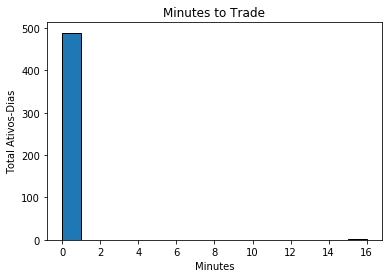

In [13]:
an.plotHistMinsToTrade()

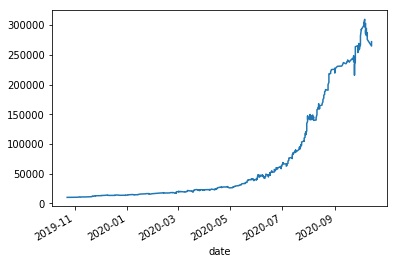

In [14]:
an.plotEquityCurve(logy=False)

In [15]:
an.maxDrawdown()

-0.14495063777847605

In [16]:
an.getSimResults()

,prevol_threshold,open_dolar_threshold,gap_threshold,F_low_threshold,F_high_threshold,short_after,exit_target,exit_stop,start_money,allocation,end_money,profit,max_drawdown,n_trades,n_filtered_ativo_days
0,800000,2,0.1,0,9,0,0.4,0.4,10000,0.1,272217.606923,25.221761,-0.144951,490,490
